<div style="text-align:center;">
    <h1> Trabajo practico semanal 3 </h1>
    <h3> Teoria de circuitos 2 </h2>
</div>

<h3><u>Consignas<u></h3>
<div style="text-align:center;">
    <img src="consignas1.png">
</div>
<img src="consignas2.png">

<h3>Desarrollo de consignas </h3>

Se adjunta el desarrollo hecho a mano:

<object data="desarrollo.pdf" type="application/pdf" width="100%" height="800px">
  <p>El archivo PDF no se puede mostrar. <a href="desarrollo.pdf">Haz clic aquí para descargarlo.</a></p>
</object>


<h3><u>Simulaciones</u><h3>
    
A continuacion se muestran las simulaciones en Python, y en LT-spice

C:\Users\guido\AppData\Local\Temp\ipykernel_328\4243023467.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


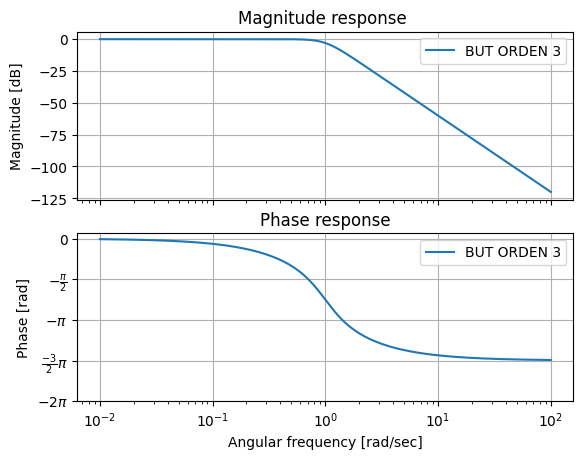

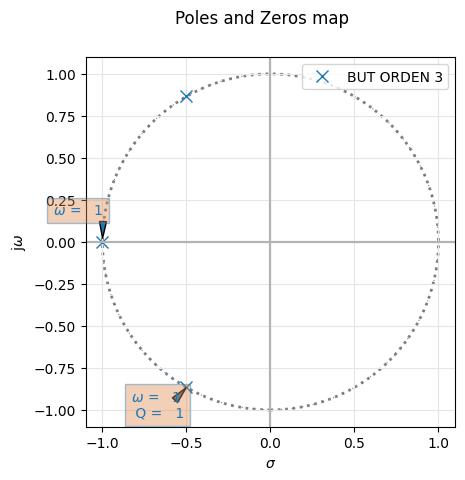

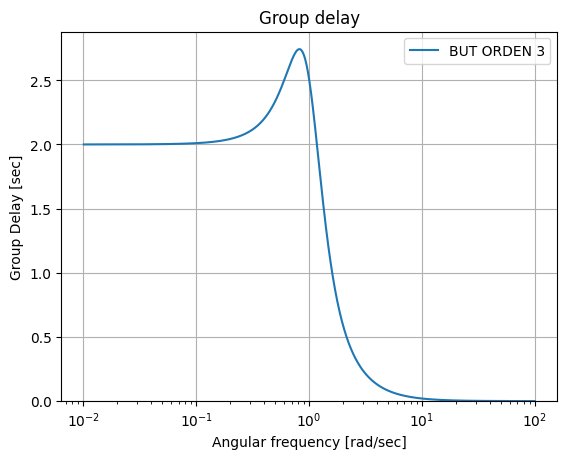

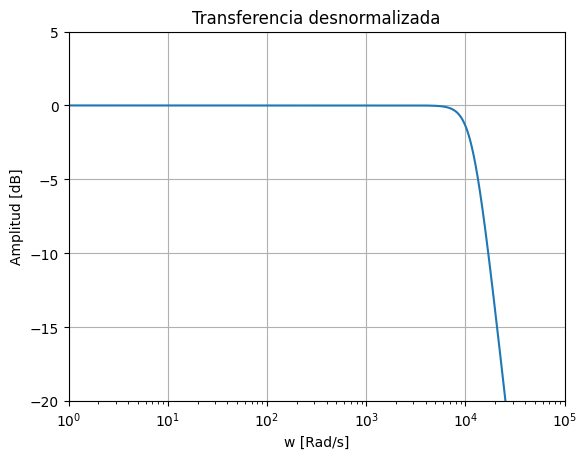

In [3]:

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction,freqs

import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import analyze_sys


def desnorm_trans(trans: TransferFunction ,norma: float):
    '''
    trans: transferencia que se desea desnormalizar o normalizar.
    norma: valor por el cual se quiere normalizar. 
    NOTA: $'.norma -> $ (si tenemos que desnormalizar una funcion debemos pasar 1/norma) 
    
    '''
    
    num_p, den_p = trans.num, trans.den
    
    num_p = [coeff*(norma**(len(num_p)-1-i)) for i,coeff in enumerate(num_p)] # aplico la normalizacion o desnormalizacion que queramos a la tf
    den_p = [coeff*(norma**(len(den_p)-1-i)) for i,coeff in enumerate(den_p)]
    num_p = np.multiply(num_p , (norma)**-3)
    den_p = np.multiply(den_p , (norma)**-3)

    tf_completa = TransferFunction(num_p, den_p)
    
    return tf_completa

def plot_trans(trans: TransferFunction,range_sim ):
    '''
    trans: Transferencia que se desea plotear.
    range_sim: es vector [a,b] donde a es el valor bajo de simulacion y b el valor hasta el que simula
    '''
    
    num_p, den_p = trans.num, trans.den
    # Calcular la respuesta en frecuencia del filtro
    
    # Obtener el numerador y el denominador del número racional
    num, den = range_sim[1].as_integer_ratio()

    # Calcular el exponente en notación científica
    exponente = int(np.log10(num))
    
    w, h = freqs(num_p, den_p, worN=np.logspace(0, exponente, 1000))

    # Convertir la respuesta en frecuencia a dB
    db = 20 * np.log10(abs(h))

    # Graficar la respuesta en frecuencia en dB
    fig1= plt.figure()
    
    plt.semilogx(w, db)
    plt.title('Transferencia desnormalizada')
    plt.xlabel('w [Rad/s]')
    plt.ylabel('Amplitud [dB]')
    plt.ylim([-20, 5])
    plt.xlim(range_sim)
    plt.grid()
    fig1.show()


# componentes

r1= 1
r2= 1
l=  1
c1= 1
c2= 1

## Transferencia segundo orden
wo = 1/np.sqrt(l * c1)
Q = (1/r1)* np.sqrt(c1/l) 

tf_segundo_den = [wo**2]
tf_segundo_num =  [1, wo/Q , wo**2]

## Transferencia primer orden
wo2 = 1/(r2 * c2)

tf_primero_den = [wo2]
tf_primero_num =  [1, wo2]

## Transferencia Sistema completo

tf_completa = TransferFunction(np.polymul(tf_primero_den, tf_segundo_den),np.polymul(tf_segundo_num,tf_primero_num))


## Simulacion Normalizada

analyze_sys( tf_completa, "BUT ORDEN 3" )


## Simulacion sin normas de frecuencia

ep = 1.253 
fp = 1500
wp = 2 * np.pi * fp

norma= ep*wp # escalamiento de $

tf_completa_des = desnorm_trans(trans= tf_completa,norma= 1/norma)

plot_trans(trans= tf_completa_des,range_sim= [1,100000])



   

Con el codigo anterior estamos graficando la respuesta del filtro normalizada, donde vemos que tiene una respuesta del tipo butterworth (ya que el epsilon se encuentra enmascarado en la norma), y vemos que para 1rad/s tenemos una atenuacion de 3,12dB y que para 2 Hz tenemos 18,38dB.
<br>
<div style="text-align:center;">
    <img src="sim1hz.png">
    <img src="sim2hz.png">
</div>
<br>
Estos valores se deben a que en realizad al estar normalizando con el epsilon, una ves hagamos la desnormalizacion todo nuestro grafico se movera para la deracha, haciendo que coincidan exactamente los valores de atenuacion que queriamos para dichas frecuencias
Tambien tenemos el grafico de polos y ceros (nuevamente para una respuesta butter) y con ella los valores correspondientes a un filtro de orden 3 (un polo sobre el eje sigma y un par de polos complejos).
Si ahora vemos la grafica desnormalizada obtenemos los siguientes valores

<br>
<div style="text-align:center;">
    <img src="sim1hz_des.png">
    <img src="sim2hz_des.png">
</div>
<br>

<h2>LT-Spice:</h2>
<br>
Para la simulacion en LT-SPICE lo que hice fue remplazar los valores normalizados de los componentes por los valores desnormalizados. Para ello hice una parametrizacion donde amplico las normas de desnormalizacion para cada componente.

<div style="text-align:center;">
    <img src="Circuito-Lt.png">
    <img src="sim-lt.png">
    <h4>nota: El eje "X" del grafico representa W</h4>
    <br>
    <img src="sim-lt-valores.png">
</div>


<p>
Como se puede observar la transferencia cumple con los pedido en la consigna ya que para una w=9,32k rad/seg (equivalente a 1,5Khz) tenemos una atenuacion de 1db. Esto se obtuvo mediante la omega normalizada de butter imponiendo que la Wn = 1 este localizada justamente en esta frecuencia, por otro lado la Ws (omega de stop) vemos que en la consigna esta impuesta para un valor de Ws = 18,889k Rad/seg (equivalente a 3KHz) con una atenuacion de 12db. Vemos en la simulacion que se cumple este valor para el cicuito que se propuso.
</p>
<p>
Una variacion que se puede hacer a este circuito es ahora implementarlo sin bobinas. La razon de hacer esto es que en electronica se busca evitar su utilizacion (si es posible), por su impracticidad para implementar, su gran tamaño y la necesidad de que alguien las construya.
Para poder hacer este cambio, debido a que es un filtro de tercer orden lo que debemos hacer es remplazar la estructura de segundo orden por una que nos permita independizarnos de las bobinas.
Para ello se utiliza una estructura conocida MFB (multiple feedback) que permite mediante dos operacionales construir un circuito que mejore las prestaciones del anterior.
Ademas se puede ver otra mejora con este circuito, que es que Q es mas insensible a las variaciones de las resistencias. Esto se ver bien en su expresion
</p>

$$
Q(rlc) = \frac{1}{R} \sqrt{\frac{C}{L}}
\\
\\
Q(MFB) = \sqrt{\frac{R1 C1}{R2 C2}} 
\\
\\
\\
$$
<p>
Podemos ver que en este caso en la primer transferencia el Q varia directamente con la variacion de R, mientras que en el segundo caso las resistencias se encuentran dentro de la raiz, reduciendo a su sensibilidad respecto estos componentes.
Lo importante para destacar es que si bien podemos construir cualquier filtro con filtros pasivos separados con buffers, siempre resultara mas adecuado implementar los filtros utilizando los operacionales, pero con configuraciones que ademas de brindar la transferencia que queremos, mejorar las prestaciones de nuestro circuito.
</p>

<div style="text-align:center;">
    <img src="Circuito-Lt(sin bobina).png">
    <img src="sim-lt(sin bobina).png">
    <br>
</div>
NOTA: los calculos se encuentran dentro del PDF del principio
